In [4]:
#####################
# CS 181, Spring 2021
# Homework 1, Problem 2
# Start Code
##################

import math
import matplotlib.cm as cm

from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as c



# Read from file and extract X and y
df = pd.read_csv('data/p2.csv')

X_df = df[['x1', 'x2']]
y_df = df['y']

X = X_df.values
y = y_df.values

print("y is:")
print(X)
print(y)



y is:
[[0.    0.4  ]
 [0.05  0.69 ]
 [0.75  0.07 ]
 [0.1   0.95 ]
 [0.125 0.12 ]
 [0.15  0.64 ]
 [0.2   0.73 ]
 [0.25  0.3  ]
 [0.3   0.29 ]
 [0.6   0.15 ]
 [0.7   0.03 ]
 [0.8   0.28 ]
 [0.97  0.04 ]]
[0.12 0.01 0.78 0.08 0.   0.   0.37 0.41 0.15 0.73 0.88 0.7  0.99]


In [18]:
(X-X[0])@W@(X-X[0])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 13)

In [19]:
W = np.array([[1., 0.], [0., 1.]])

def predict_kernel(alpha=0.1):
    """Returns predictions using kernel-based predictor with the specified alpha."""
    # TODO: your code here
    W1=W*alpha
    N=np.shape(X)[0]
    y_df=np.zeros(N)
    for i in range(N):
        kernelup=0
        kerneldown=0
        for j in range(N):
            if(j!=i):
                kernelup+=np.exp(-((X[j][0]-X[i][0])**2*W1[0][0]+2*(X[j][0]-X[i][0])*(X[j][1]-X[i][1])*W1[0][1]+(X[j][1]-X[i][1])**2*W1[1][1]))*(y[j])
                kerneldown+=np.exp(-((X[j][0]-X[i][0])**2*W1[0][0]+2*(X[j][0]-X[i][0])*(X[j][1]-X[i][1])*W1[0][1]+(X[j][1]-X[i][1])**2*W1[1][1]))
        y_df[i]=kernelup/kerneldown
    return y_df

def predict_knn(k=1):
    """Returns predictions using KNN predictor with the specified k."""
    # TODO: your code here
    W1=W
    N=np.shape(X)[0]
    dX=np.zeros(N)
    y_df=np.zeros(N)
    
    for i in range(N):
        for j in range(N):
            if(j!=i):
                dX[j]=(X[j][0]-X[i][0])**2*W1[0][0]+2*(X[j][0]-X[i][0])*(X[j][1]-X[i][1])*W1[0][1]+(X[j][1]-X[i][1])**2*W1[1][1]
        dX[i]=9999999
        kidarray=np.argsort(dX)
        sumk=0
        for j in range(k):
            sumk+=y[kidarray[j]]
        y_df[i]=sumk/k

    return y_df



[0.41525658 0.42190456 0.38011482 0.41373249 0.43245956 0.42545916
 0.39338378 0.39737931 0.42080241 0.38016794 0.37088102 0.3852259
 0.36622138]
L2: 1.8399712540879825


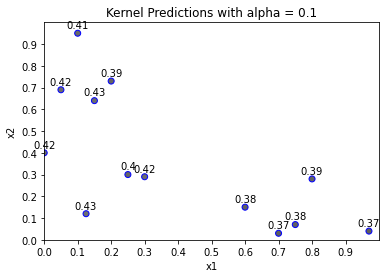

[0.23046553 0.2151213  0.62322758 0.18176051 0.36432092 0.24804181
 0.17938235 0.30964323 0.37751856 0.52381587 0.58654135 0.60787603
 0.67178068]
L2: 0.6200161545448002


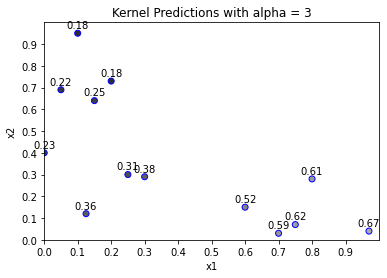

[0.14963266 0.15967943 0.79617635 0.14931207 0.28017341 0.18413468
 0.06125387 0.18399052 0.32074992 0.67386827 0.74776934 0.79180357
 0.77872116]
L2: 0.3900129358555044


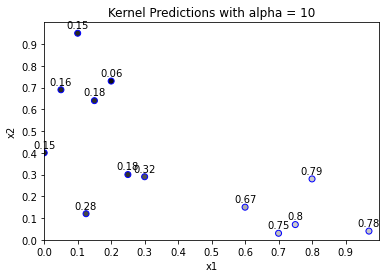

[0.41 0.   0.88 0.37 0.41 0.37 0.   0.15 0.41 0.88 0.78 0.78 0.78]
L2: 0.8383999999999999


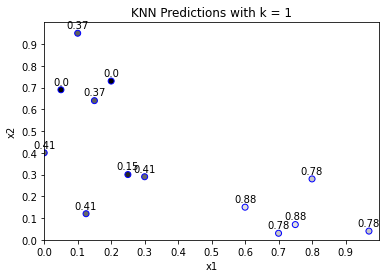

[0.114 0.196 0.69  0.182 0.282 0.198 0.124 0.2   0.252 0.584 0.67  0.706
 0.648]
L2: 0.46929999999999994


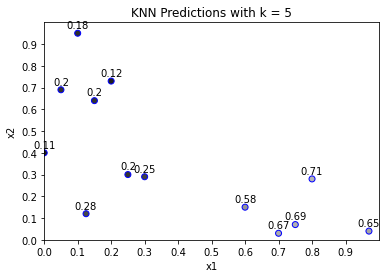

[0.425      0.43416667 0.37       0.42833333 0.435      0.435
 0.40416667 0.40083333 0.4225     0.37416667 0.36166667 0.37666667
 0.3525    ]
L2: 1.922573611111111


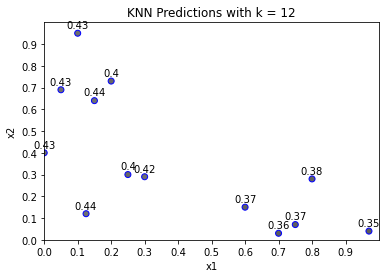

In [20]:
def plot_kernel_preds(alpha):
    title = 'Kernel Predictions with alpha = ' + str(alpha)
    plt.figure()
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim((0, 1))
    plt.ylim((0, 1))

    plt.xticks(np.arange(0, 1, 0.1))
    plt.yticks(np.arange(0, 1, 0.1))
    y_pred = predict_kernel(alpha)
    print(y_pred)
    print('L2: ' + str(sum((y - y_pred) ** 2)))
    norm = c.Normalize(vmin=0.,vmax=1.)
    plt.scatter(df['x1'], df['x2'], c=y_pred, cmap='gray', vmin=0, vmax = 1, edgecolors='b')
    for x_1, x_2, y_ in zip(df['x1'].values, df['x2'].values, y_pred):
        plt.annotate(str(round(y_, 2)),
                     (x_1, x_2), 
                     textcoords='offset points',
                     xytext=(0,5),
                     ha='center') 

    # Saving the image to a file, and showing it as well
    plt.savefig('alpha' + str(alpha) + '.png')
    plt.show()

def plot_knn_preds(k):
    title = 'KNN Predictions with k = ' + str(k)
    plt.figure()
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim((0, 1))
    plt.ylim((0, 1))

    plt.xticks(np.arange(0, 1, 0.1))
    plt.yticks(np.arange(0, 1, 0.1))
    y_pred = predict_knn(k)
    print(y_pred)
    print('L2: ' + str(sum((y - y_pred) ** 2)))
    norm = c.Normalize(vmin=0.,vmax=1.)
    plt.scatter(df['x1'], df['x2'], c=y_pred, cmap='gray', vmin=0, vmax = 1, edgecolors='b')
    for x_1, x_2, y_ in zip(df['x1'].values, df['x2'].values, y_pred):
        plt.annotate(str(round(y_, 2)),
                     (x_1, x_2), 
                     textcoords='offset points',
                     xytext=(0,5),
                     ha='center') 
    # Saving the image to a file, and showing it as well
    plt.savefig('k' + str(k) + '.png')
    plt.show()

for alpha in (0.1, 3, 10):
    # TODO: Print the loss for each chart.
    plot_kernel_preds(alpha)

for k in (1, 5, len(X)-1):
    # TODO: Print the loss for each chart.
    plot_knn_preds(k)
